In [ ]:
from IPython import get_ipython
from IPython.display import display

import cv2
import numpy as np
import os
import sys
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(os.listdir('/content/drive/My Drive/Colab Notebooks/'))

['Copy of Part03:ML Traffic (1).ipynb', 'Copy of Part03:ML Traffic.ipynb', 'Part03:ML Traffic.ipynb']


In [ ]:
EPOCHS = 10
IMG_WIDTH = 32
IMG_HEIGHT = 32
NUM_CATEGORIES = 43
TEST_SIZE = 0.4

In [26]:
def main():

    # Check command-line arguments
    if len(sys.argv) not in [2, 3]:
        sys.exit("Usage: python traffic.py data_directory [model.h5]")

    # Get image arrays and labels for all image files
    images, labels = load_data(sys.argv[1])

    # Split data into training and testing sets
    labels = tf.keras.utils.to_categorical(labels)
    x_train, x_test, y_train, y_test = train_test_split(
        np.array(images), np.array(labels), test_size=TEST_SIZE
    )

    # Get a compiled neural network
    model = get_model()

    # Fit model on training data
    model.fit(x_train, y_train, epochs=EPOCHS)

    # Evaluate neural network performance
    model.evaluate(x_test,  y_test, verbose=2)

    # Save model to file
    model_file = '/conent/drive/My Drive/Colab Notebooks/saved_models/model.h5'
    model.save(model_file)
    print(f"Model saved to {model_file}.")

In [ ]:
# Define paths to your training and testing data directories
train_data_dir = '/content/drive/My Drive/gtsrb-small'
test_data_dir = '/content/drive/My Drive/gtsrb'

# Function to load images and labels from a directory
def load_data(data_dir):
  images = []
  labels = []
  for class_folder in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_folder)
    if os.path.isdir(class_path):
      for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
        images.append(image)
        labels.append(int(class_folder))
  return images, labels

# Load training and testing data
train_images, train_labels = load_data(train_data_dir)
test_images, test_labels = load_data(test_data_dir)

# Convert lists to NumPy arrays for easier processing
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)
train_images, train_labels = load_data(train_data_dir)
test_images, test_labels = load_data(test_data_dir)

# Convert lists to NumPy arrays for easier processing
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
data_dir = '/content/drive/My Drive/gtsrb'

X, y = load_data(data_dir)
X = np.array(X)/255
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

print(f'{X}, {y}')


# print(f'{images.shape}, {labels.shape}')


[[[[0.17647059 0.31764706 0.33333333]
   [0.19607843 0.34117647 0.37647059]
   [0.25098039 0.41176471 0.44705882]
   ...
   [0.47843137 0.67843137 0.82352941]
   [0.40392157 0.54509804 0.69019608]
   [0.30588235 0.43529412 0.47058824]]

  [[0.17254902 0.33333333 0.32941176]
   [0.19607843 0.36470588 0.4       ]
   [0.25098039 0.44313725 0.48627451]
   ...
   [0.4        0.63137255 0.78823529]
   [0.41176471 0.60392157 0.76862745]
   [0.34509804 0.51372549 0.6       ]]

  [[0.22352941 0.39607843 0.4       ]
   [0.22745098 0.41960784 0.45882353]
   [0.27058824 0.4745098  0.52156863]
   ...
   [0.38823529 0.61176471 0.74901961]
   [0.39215686 0.63921569 0.8       ]
   [0.45098039 0.69019608 0.81176471]]

  ...

  [[0.20784314 0.29803922 0.31372549]
   [0.20392157 0.28627451 0.27058824]
   [0.2        0.29803922 0.29019608]
   ...
   [0.32156863 0.31372549 0.34901961]
   [0.50196078 0.49803922 0.53333333]
   [0.94509804 0.9372549  0.94901961]]

  [[0.21568627 0.30588235 0.32156863]
   [0.1

In [ ]:
def get_model():
    """
    Returns a compiled convolutional neural network model. Assume that the
    `input_shape` of the first layer is `(IMG_WIDTH, IMG_HEIGHT, 3)`.
    The output layer should have `NUM_CATEGORIES` units, one for each category.
    """
     # Access global variables IMG_WIDTH, IMG_HEIGHT, NUM_CATEGORIES
    global IMG_WIDTH, IMG_HEIGHT, NUM_CATEGORIES

    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(IMG_WIDTH,IMG_HEIGHT, 3)))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Flatten the output of the convolutional layers
    model.add(Flatten())

    # Dense layers for classing them
    model.add(Dense(128, activation='relu'))

    model.add(Dropout(0.5))

    model.add(Dense(NUM_CATEGORIES, activation='softmax'))

    # compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


    return model

# Get the model
model = get_model()


from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow(x_train, y_train, batch_size=32)  # Adjust batch_size as needed
model = get_model()

model.fit(train_generator, epochs=EPOCHS)  # Use train_generator instead of x_train, y_train

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.7135 - loss: 2.1742
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.8585 - loss: 0.4583
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.8628 - loss: 0.4339
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.8751 - loss: 0.3378
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.8644 - loss: 0.3483
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.8774 - loss: 0.3230
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.8867 - loss: 0.2902
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.8826 - loss: 0.2881
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.8783 - loss: 0.2928
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.8867 - loss: 0.2392


In [ ]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))

# Add your own classification layers on top of the base model
# ...

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=EPOCHS)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.8795 - loss: 0.2762
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.8842 - loss: 0.2088
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9254 - loss: 0.2034
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9519 - loss: 0.1242
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9487 - loss: 0.1522
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.9653 - loss: 0.1002
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.9778 - loss: 0.0757
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.9784 - loss: 0.0619
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9796 - loss: 0.0649
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9765 - loss: 0.0574


In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
# y_test_array = np.array(y_test)
cm = confusion_matrix(y_test, y_pred.argmax(axis=1), labels=np.unique(y_test))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


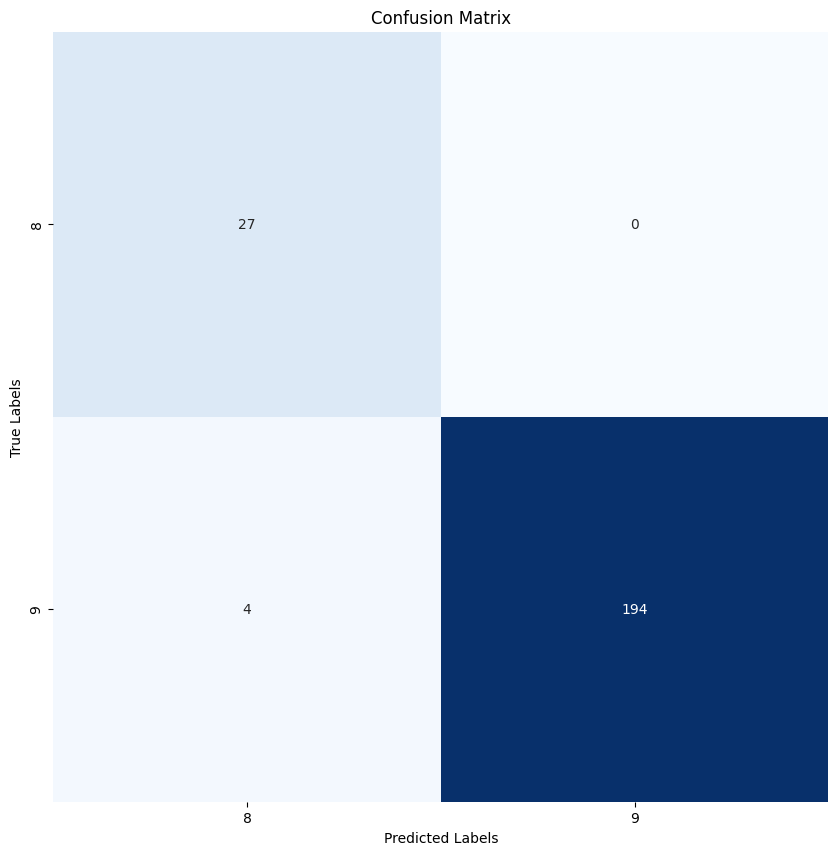

In [ ]:
plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import os
print(os.getcwd())

/content


Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 1.0000 - loss: 0.0014

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 4.5755e-04
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.9997 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.9977 - loss: 0.0051 - val_accuracy: 0.9956 - val_loss: 0.0053
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 1.0000 - loss: 8.5444e-04 - val_accuracy: 1.0000 - val_loss: 3.2722e-04
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9956 - val_loss: 0.0151
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 1.0000 - loss: 5.7987e-04 - val_accuracy: 1.0000 - val_loss: 1.1842e-04
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9987 - loss: 0.0032 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9998 - loss: 0.0015 - val_accuracy: 

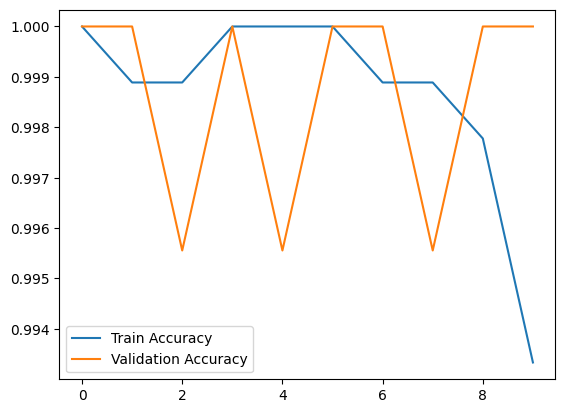

Model Accuracy: 1.00


In [ ]:
# Plot learning curves
# Assign the output of model.fit to the history variable
y_test_array = np.array(y_test)

# Create a validation data generator
validation_generator = datagen.flow(x_test, y_test_array, batch_size=32, shuffle=False)  # Set shuffle=False for validation

# Train the model with validation using the validation_generator
history = model.fit(train_generator, epochs=EPOCHS, validation_data=validation_generator)

plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.show()

# Print final model evaluation
loss, accuracy = model.evaluate(x_test, y_test_array, verbose=0)  # Use x_test and y_test as defined earlier, and add verbose=0 to suppress output
print(f"Model Accuracy: {accuracy:.2f}")
